<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Ejercicio 5</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>estudiante: Lazcano Lagos Jhony Brandon</i></h5>
  <h5 align="center"><i>estudiante: Ramírez Montes Jonathan Natael</i></h5>
  <h5 align="center"><i>Análisis Multivariado</i></h5>
  </font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import dijkstra
from math import inf
import math
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA as skLearnPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:

def scatterPlot(plt,datasetPD,col_1,col_2,colorDots='darkblue',label=None,shift=0.05,**kwargs):
    dataPD = datasetPD[[col_1,col_2]]
    plt.scatter(dataPD[col_1],dataPD[col_2],color=colorDots)
    if(label!=None):
        points = datasetPD[[col_1,col_2,label]].values
        for point in points:
            plt.text(point[0]+shift,point[1]+shift,str(point[2]))
    plt.axvline(**kwargs)
    plt.axhline(**kwargs)

In [3]:
def find_all(wmat, start, end=-1):
    """
    Returns a tuple with a distances' list and paths' list of
    all remaining vertices with the same indexing.
        (distances, paths)
    For example, distances[x] are the shortest distances from x
    vertex which shortest path is paths[x]. x is an element of
    {0, 1, ..., n-1} where n is the number of vertices
    Args:
    wmat    --  weighted graph's adjacency matrix
    start   --  paths' first vertex
    end     --  (optional) path's end vertex. Return just the 
                distance and its path
    Exceptions:
    Index out of range, Be careful with start and end vertices
    """
    n = len(wmat)

    dist = [inf]*n
    dist[start] = wmat[start][start]  # 0

    spVertex = [False]*n
    parent = [-1]*n

    path = [{}]*n

    for count in range(n-1):
        minix = inf
        u = 0

        for v in range(len(spVertex)):
            if spVertex[v] == False and dist[v] <= minix:
                minix = dist[v]
                u = v

        spVertex[u] = True
        for v in range(n):
            if not(spVertex[v]) and wmat[u][v] != 0 and dist[u] + wmat[u][v] < dist[v]:
                parent[v] = u
                dist[v] = dist[u] + wmat[u][v]

    for i in range(n):
        j = i
        s = []
        while parent[j] != -1:
            s.append(j)
            j = parent[j]
        s.append(start)
        path[i] = s[::-1]

    return (dist[end], path[end]) if end >= 0 else (dist, path)
def find_shortest_distance(wmat, start, end=-1):
    """
    Returns distances' list of all remaining vertices.
    Args:
    wmat    --  weigthted graph's adjacency matrix
    start   --  paths' first vertex
    end     --  (optional) path's end vertex. Return just
                the distance
    Exceptions:
    Index out of range, Be careful with start and end vertices.
    """
    return find_all(wmat, start, end)[0]

In [4]:
pip install Dijkstar

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Matriz de adyacencia

Gracias a la grafica podemos dar la siguiente matriz de adyacencia

In [5]:
matriz=[[0,1,1,1,0,1,0,0,0,0,0,0,0],
        [1,0,0,0,1,0,0,0,0,0,0,0,0],
        [1,0,0,1,1,1,1,0,0,0,0,0,0],
        [1,0,1,0,1,0,0,0,0,0,0,0,0],
        [0,1,1,1,0,1,0,0,0,0,0,0,0],
        [1,0,1,0,1,0,1,0,0,0,0,0,0],
        [0,0,1,0,0,1,0,1,0,0,0,0,1],
        [0,0,0,0,0,0,1,0,1,1,1,0,1],
        [0,0,0,0,0,0,0,1,0,1,0,1,0],
        [0,0,0,0,0,0,0,1,1,0,1,0,1],
        [0,0,0,0,0,0,0,1,0,1,0,1,1],
        [0,0,0,0,0,0,0,0,1,0,1,0,1],
        [0,0,0,0,0,0,1,1,0,1,1,1,0]]
matriz

[[0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0]]

obtengamos nuestra matriz de distancia

In [6]:
distancia=[]
for i in range(13):
    distancia.append(find_shortest_distance(matriz,i))
distancia

[[0, 1, 1, 1, 2, 1, 2, 3, 4, 4, 4, 4, 3],
 [1, 0, 2, 2, 1, 2, 3, 4, 5, 5, 5, 5, 4],
 [1, 2, 0, 1, 1, 1, 1, 2, 3, 3, 3, 3, 2],
 [1, 2, 1, 0, 1, 2, 2, 3, 4, 4, 4, 4, 3],
 [2, 1, 1, 1, 0, 1, 2, 3, 4, 4, 4, 4, 3],
 [1, 2, 1, 2, 1, 0, 1, 2, 3, 3, 3, 3, 2],
 [2, 3, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1],
 [3, 4, 2, 3, 3, 2, 1, 0, 1, 1, 1, 2, 1],
 [4, 5, 3, 4, 4, 3, 2, 1, 0, 1, 2, 1, 2],
 [4, 5, 3, 4, 4, 3, 2, 1, 1, 0, 1, 2, 1],
 [4, 5, 3, 4, 4, 3, 2, 1, 2, 1, 0, 1, 1],
 [4, 5, 3, 4, 4, 3, 2, 2, 1, 2, 1, 0, 1],
 [3, 4, 2, 3, 3, 2, 1, 1, 2, 1, 1, 1, 0]]

# Escalamiento multidimensional

Hagamos un escalamiento multidimensional para ver los datos en 2 dimensiones

,nodo,x1,x2
0,1,-1.881273,0.460269
1,2,-2.709656,1.059020
2,3,-0.630417,0.757842
3,4,-0.977399,1.769300
4,5,-1.398925,1.382776
5,6,-0.981102,0.089796
6,7,0.113394,0.015606
7,8,0.896491,-0.588242
8,9,2.100723,-0.605068
9,10,1.183358,-1.754813


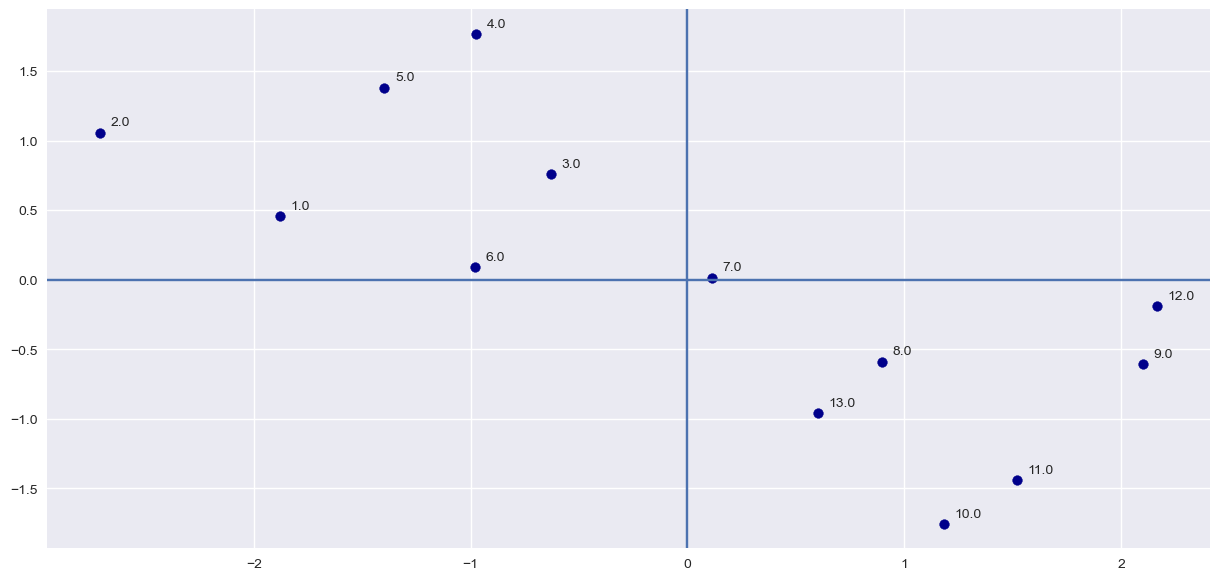

In [7]:
cols = ['x1','x2']

mdsVectors = manifold.MDS(n_components=2,dissimilarity='precomputed',random_state=40)\
                     .fit_transform(distancia)

mapPD = pd.DataFrame(mdsVectors,columns=cols)
mapPD['nodo'] = list(range(1,14))

display(mapPD[['nodo','x1','x2']])

plt.style.use('seaborn')
plt.figure(figsize=(15,7))
scatterPlot(plt,mapPD,'x1','x2','darkblue',label='nodo')

# K-means

Usemos K-means para separar en grupos

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,k,inertia
0,1,224.916655
1,2,56.209242
2,3,31.047570
3,4,19.874523
4,5,13.052548
5,6,9.663707
6,7,7.883863
7,8,4.618705
8,9,3.280701


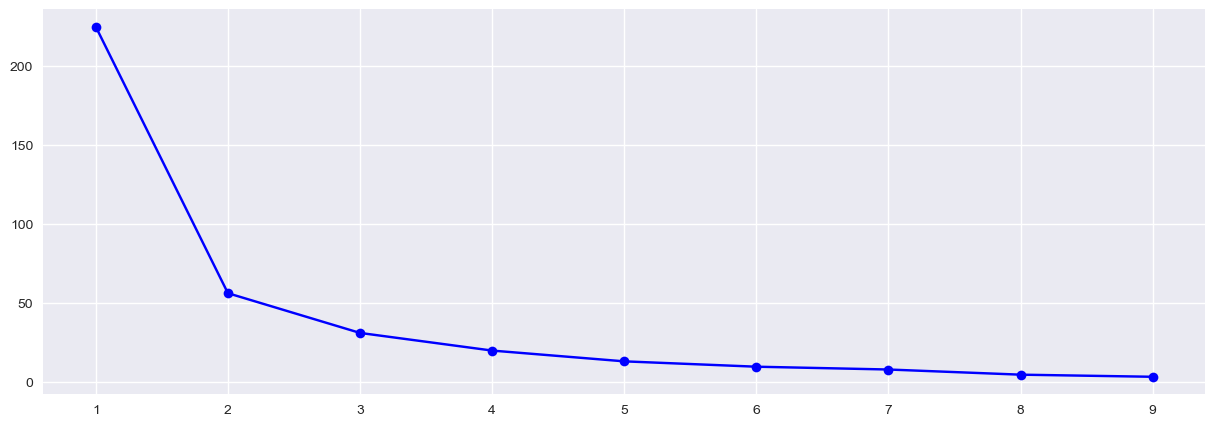

In [8]:
tabla_k = []
for k in list(range(1,10)):
    kmeans = KMeans(n_clusters = k).fit(mapPD)
    tabla_k.append([k, kmeans.inertia_])
    
tabla_k_df = pd.DataFrame(tabla_k, columns = ['k', 'inertia'])
display(tabla_k_df)
plt.figure(figsize=(15,5))
plt.plot(tabla_k_df['k'].values,tabla_k_df['inertia'].values,'b-o')
plt.show()

Por la grafica anterior podemos ver que tenemos 2 clusters por lo que aplicaremos el algoritmo para ese numero

In [9]:
kmeans = KMeans(n_clusters = 2).fit(mapPD)
mapPD["grupo"]= kmeans.predict(mapPD)
mapPD

,x1,x2,nodo,grupo
0,-1.881273,0.460269,1,1
1,-2.709656,1.059020,2,1
2,-0.630417,0.757842,3,1
3,-0.977399,1.769300,4,1
4,-1.398925,1.382776,5,1
5,-0.981102,0.089796,6,1
6,0.113394,0.015606,7,0
7,0.896491,-0.588242,8,0
8,2.100723,-0.605068,9,0
9,1.183358,-1.754813,10,0


# Grafico de silhouette

Hagamos el grafico para ver si se separan correctamente los datos

In [10]:
grupos = list(mapPD['grupo'].unique())
mapPD['silhouette'] = silhouette_samples(mapPD[cols], mapPD['grupo'])
mapPD = mapPD.sort_values(['grupo','silhouette'],ascending=False)
mapPD

,x1,x2,nodo,grupo,silhouette
4,-1.398925,1.382776,5,1,0.692496
0,-1.881273,0.460269,1,1,0.651704
1,-2.709656,1.059020,2,1,0.620112
3,-0.977399,1.769300,4,1,0.604571
2,-0.630417,0.757842,3,1,0.500346
5,-0.981102,0.089796,6,1,0.446989
10,1.518648,-1.439688,11,0,0.694780
8,2.100723,-0.605068,9,0,0.668436
9,1.183358,-1.754813,10,0,0.646350
7,0.896491,-0.588242,8,0,0.632214


In [11]:
mapPD=mapPD.reset_index().reset_index()

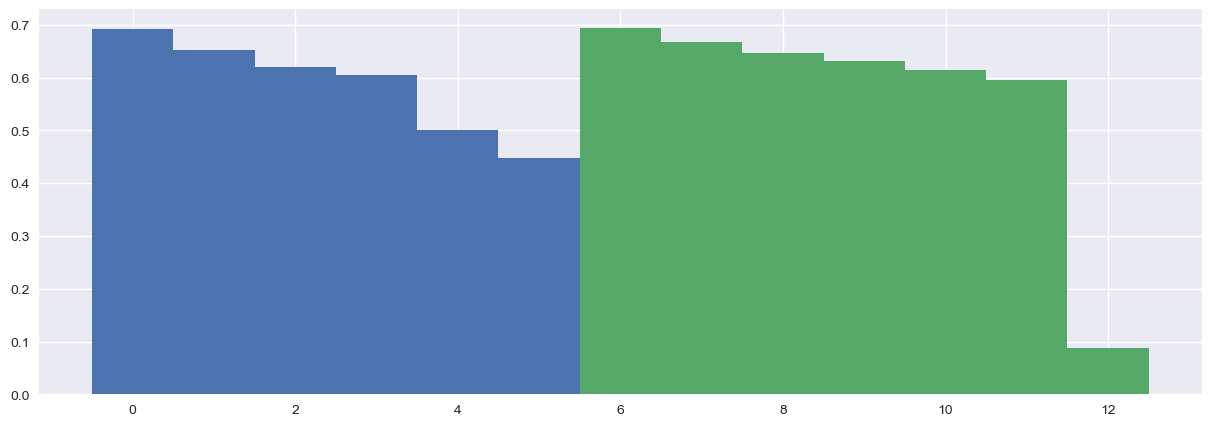

In [12]:
plt.figure(figsize=(15,5))
for grupo in grupos:
    group_df = mapPD[mapPD['grupo']==grupo]
    plt.bar(group_df['level_0'],group_df['silhouette'],width=1)

Como podemos ver la separación es buena y cada dato cae en su cluster correspondiente

Usando esta información podemos recomendar productos que esten en su mismo grupo.

Por ejemplo al momento de comprar un producto del grupo 0 recomendar más productos del mismo grupo.

Otra opcion es poner cada grupo en un mismo apartado, es decir que los productos de un mismo grupo siempre se muestren juntos